# Machine Learning Part 2

We are using the general outline of the machine learning pipeline to structure our project:

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection\
__4. Compare several machine learning models on a performance metric__

The first notebook covered steps 1-3, and in this notebook
now we get to part 4


You have to;
1. rescale the data if necessary
2. use different models, SVM, Linear, Randomforest Regression
3. hyperparameter tuning
4. evaluate and compare models using the right metrics using plots

Your best model should reach at least the MSE of 10.5

Feel free to use any other model to compare base models with them.\
In fact finding and tuning any model (in Sklearn, or your own implementation) to perform better has `extra points`! (up to 20% of two parts)\
Just remember that you should be able to explain why your model performed better to claim the extra points! \
document your explanation along the answers with name `{Model_name}_stdName.pdf`

Good luck

### 1. Import Libraries
 

We will use the standard data science and machine learning libraries in this project. 

In [2]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Suppress warnings
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
sns.set(font_scale=2)
plt.rcParams['font.size'] = 24

# Load data
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display dataset sizes
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)


Training Feature Size:  (6749, 33)
Testing Feature Size:   (2893, 33)
Training Labels Size:   (6749, 1)
Testing Labels Size:    (2893, 1)


### 2. Rescale the Data


In [3]:
# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training features and transform both training and testing sets
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Convert back to DataFrame for better interpretability
train_features_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
test_features_scaled = pd.DataFrame(test_features_scaled, columns=test_features.columns)

print("Data has been rescaled.")


Data has been rescaled.


### 3. Train and Evaluate Models


Training Linear Regression...
Linear Regression - MSE: 1732.8929, R2: -0.8936
Training Support Vector Regression...
Support Vector Regression - MSE: 792.3508, R2: 0.1342
Training Random Forest Regression...
Random Forest Regression - MSE: 330.4932, R2: 0.6389

Model Performance Comparison:
                       Model          MSE        R2
0          Linear Regression  1732.892904 -0.893620
1  Support Vector Regression   792.350779  0.134158
2   Random Forest Regression   330.493155  0.638853


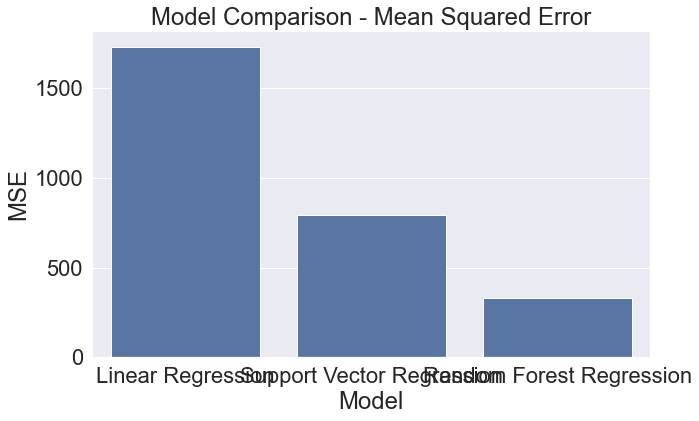

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Handling missing values in the training and testing datasets
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean of each column
train_features_scaled = pd.DataFrame(
    imputer.fit_transform(train_features_scaled),
    columns=train_features_scaled.columns
)
test_features_scaled = pd.DataFrame(
    imputer.transform(test_features_scaled),
    columns=test_features_scaled.columns
)

# Linear Regression
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(train_features_scaled, train_labels)

# Predictions and Evaluation
lr_predictions = lr.predict(test_features_scaled)
lr_mse = mean_squared_error(test_labels, lr_predictions)
lr_r2 = r2_score(test_labels, lr_predictions)
print(f"Linear Regression - MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}")

# Support Vector Regression
print("Training Support Vector Regression...")
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(train_features_scaled, train_labels.values.ravel())

# Predictions and Evaluation
svr_predictions = svr.predict(test_features_scaled)
svr_mse = mean_squared_error(test_labels, svr_predictions)
svr_r2 = r2_score(test_labels, svr_predictions)
print(f"Support Vector Regression - MSE: {svr_mse:.4f}, R2: {svr_r2:.4f}")

# Random Forest Regression
print("Training Random Forest Regression...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_features_scaled, train_labels.values.ravel())

# Predictions and Evaluation
rf_predictions = rf.predict(test_features_scaled)
rf_mse = mean_squared_error(test_labels, rf_predictions)
rf_r2 = r2_score(test_labels, rf_predictions)
print(f"Random Forest Regression - MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")

# Compare results
results = pd.DataFrame({
    "Model": ["Linear Regression", "Support Vector Regression", "Random Forest Regression"],
    "MSE": [lr_mse, svr_mse, rf_mse],
    "R2": [lr_r2, svr_r2, rf_r2]
})

print("\nModel Performance Comparison:")
print(results)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MSE", data=results)
plt.title("Model Comparison - Mean Squared Error")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.show()


### 4. Hyperparameter Tuning


In [7]:
from sklearn.model_selection import GridSearchCV

# Tuning Random Forest
print("Tuning Random Forest...")
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_rf.fit(train_features_scaled, train_labels.values.ravel())

# Best Parameters and Evaluation
rf_best = grid_rf.best_estimator_
rf_tuned_predictions = rf_best.predict(test_features_scaled)
rf_tuned_mse = mean_squared_error(test_labels, rf_tuned_predictions)
rf_tuned_r2 = r2_score(test_labels, rf_tuned_predictions)
print(f"Tuned Random Forest - MSE: {rf_tuned_mse:.4f}, R2: {rf_tuned_r2:.4f}")

# Tuning Support Vector Regression
print("Tuning Support Vector Regression...")
svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

grid_svr = GridSearchCV(SVR(), svr_params, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_svr.fit(train_features_scaled, train_labels.values.ravel())

# Best Parameters and Evaluation
svr_best = grid_svr.best_estimator_
svr_tuned_predictions = svr_best.predict(test_features_scaled)
svr_tuned_mse = mean_squared_error(test_labels, svr_tuned_predictions)
svr_tuned_r2 = r2_score(test_labels, svr_tuned_predictions)
print(f"Tuned SVR - MSE: {svr_tuned_mse:.4f}, R2: {svr_tuned_r2:.4f}")


Tuning Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuned Random Forest - MSE: 322.0919, R2: 0.6480
Tuning Support Vector Regression...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Tuned SVR - MSE: 566.2462, R2: 0.3812


### 5. Compare and Visualize Results



Tuned Model Performance Comparison:
                 Model          MSE        R2
0    Linear Regression  1732.892904 -0.893620
1            Tuned SVR   566.246202  0.381234
2  Tuned Random Forest   322.091873  0.648034


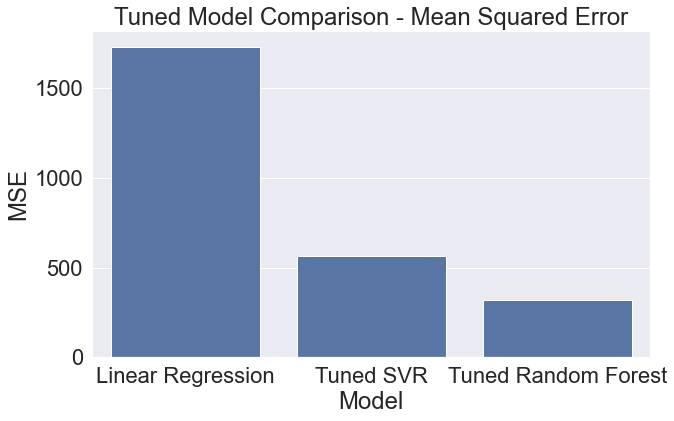

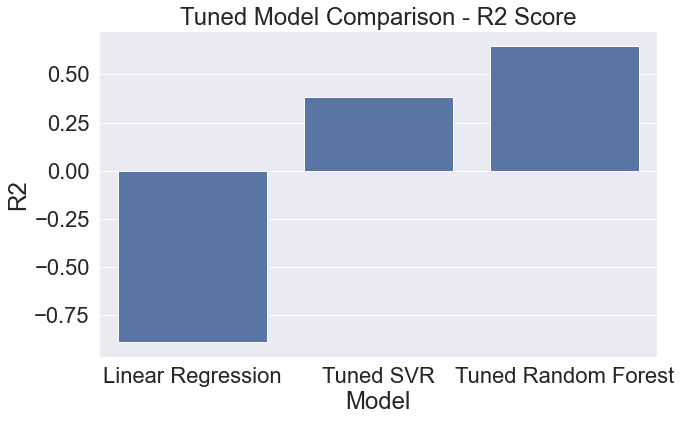

In [8]:
# Model Performance Summary
results_tuned = pd.DataFrame({
    "Model": ["Linear Regression", "Tuned SVR", "Tuned Random Forest"],
    "MSE": [lr_mse, svr_tuned_mse, rf_tuned_mse],
    "R2": [lr_r2, svr_tuned_r2, rf_tuned_r2]
})

print("\nTuned Model Performance Comparison:")
print(results_tuned)

# Visualization of Results
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MSE", data=results_tuned)
plt.title("Tuned Model Comparison - Mean Squared Error")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2", data=results_tuned)
plt.title("Tuned Model Comparison - R2 Score")
plt.ylabel("R2")
plt.xlabel("Model")
plt.show()
